<a href="https://colab.research.google.com/github/lewis-m/erk-kinetics-tda/blob/master/PyStanTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Prerequesite installations
#Run once everytime runtime is restarted

import numpy as np
import cython

!pip install pystan
!pip install Ripser
!pip install MMD

import pystan as ps
from ripser import ripser
from persim import plot_diagrams, bottleneck, images

     |████████████████████████████████| 163kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/b1/94/a4/3a8b83ac84f51857a2015a3f25790bc5b80647fec766cf4ec0
Successfully built MMD


In [0]:
#Upload file/data
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving phosphomimeticMEKdata.xlsx to phosphomimeticMEKdata (1).xlsx
Saving FirstData.xlsx to FirstData (1).xlsx


In [0]:
from google.colab import files


"""
for type in y_type:
  f_name = '%sBayesHeat.png' % type
  files.download(f_name)
"""

files.download('Pi2FullHist.png')

In [0]:
#Import empirical data
import numpy as np
import pandas as pd

xlsx = pd.ExcelFile('FirstData.xlsx')
df = pd.read_excel(xlsx, 'Wild Type')
df  = df.iloc[5:12]

t1 = df.iloc[:, [1,2,3]]
t2 = df.iloc[:, [6,7,8]]
t3 = df.iloc[:, [11,12,13]]
t4 = df.iloc[:, [16,17,18]]
t5 = df.iloc[:, [21,22,23]]

wild_type = np.array([t1.values, t2.values, t3.values, t4.values, t5.values])

df = pd.read_excel(xlsx, 'Y130C')
df  = df.iloc[5:12]

t1 = df.iloc[:, [1,2,3]]
t2 = df.iloc[:, [6,7,8]]
t3 = df.iloc[:, [11,12,13]]
t4 = df.iloc[:, [16,17,18]]
t5 = df.iloc[:, [21,22,23]]

y130c = np.array([t1.values, t2.values, t3.values, t4.values, t5.values])

df = pd.read_excel(xlsx, 'F53S')
df  = df.iloc[5:12]

t1 = df.iloc[:, [1,2,3]]
t2 = df.iloc[:, [6,7,8]]
t3 = df.iloc[:, [11,12,13]]
t4 = df.iloc[:, [16,17,18]]
t5 = df.iloc[:, [21,22,23]]

f53s = np.array([t1.values, t2.values, t3.values, t4.values, t5.values])

df = pd.read_excel(xlsx, 'E203K')
df  = df.iloc[5:12]

t1 = df.iloc[:, [1,2,3]]
t2 = df.iloc[:, [6,7,8]]
t3 = df.iloc[:, [11,12,13]]
t4 = df.iloc[:, [16,17,18]]
t5 = df.iloc[:, [21,22,23]]

e203k = np.array([t1.values, t2.values, t3.values, t4.values, t5.values])


#put all data into one data frame
bayes_td = np.array([wild_type, y130c, f53s, e203k])

In [0]:
#Import in-vivo data

xlsx = pd.ExcelFile('phosphomimeticMEKdata.xlsx')
df = pd.read_excel(xlsx, 'P-MEKWT_KRTA')

t1 = df.iloc[3:10, 1:4]
t2 = df.iloc[13:20, 1:4]
t3 = df.iloc[23:30, 1:4]
t4 = df.iloc[33:40, 1:4]
t5 = df.iloc[43:50, 1:4]

invivo1 = np.array([t1.values, t2.values, t3.values, t4.values, t5.values])

df = pd.read_excel(xlsx, 'SSDD')

t1 = df.iloc[3:10, 1:4]
t2 = df.iloc[13:20, 1:4]
t3 = df.iloc[24:31, 1:4]
t4 = df.iloc[35:42, 1:4]
t5 = df.iloc[46:53, 1:4]
t6 = df.iloc[57:64, 1:4]


invivo2 = np.array([t1.values, t2.values, t3.values, t4.values, t5.values, t6.values])
#print(invivo2)

bayes_td = np.array([wild_type, y130c, f53s, e203k, invivo1, invivo2])

In [0]:
#Import bootstrapped data

file_names = ['WildType.xlsx', 'Y130C.xlsx', 'F53S.xlsx', 'E203K.xlsx']
bs_data = []

for file_name in file_names:
  xlsx = pd.ExcelFile(file_name)

  df = pd.read_excel(xlsx, 'Sheet1')
  df = df.iloc[1:(-1), 0:3]

  bs_data.append(df.values)

In [0]:
#Caluculate variances
variance = np.var(bayes_td, axis = 1)

print(variance)

[[[0.407898743208211 0.44202692154055684 0.08872811066551656]
  [0.3482158047554182 0.2346684200252743 0.07985859685628442]
  [0.44241425823285035 0.20837829342483077 0.11903757620745647]
  [0.34025579141089596 0.09476706535235742 0.12930036536600711]
  [0.19981381767885548 0.02593906022502403 0.1449450950999056]
  [0.1488271854748052 0.24476519576693206 0.6979500950176968]
  [0.0436605479212564 0.02505282004636366 0.12271341234043029]]

 [[0.31274399999999997 0.07908000000000001 0.15630400000000003]
  [0.06798399999999998 0.122376 0.06270399999999998]
  [0.09893600000000002 0.162584 0.11512]
  [0.07109599999999999 0.18781600000000007 0.062104000000000006]
  [0.10921600000000001 0.09809599999999999 0.06509600000000001]
  [0.021416 0.033464 0.081344]
  [0.004136 0.0 0.004136000000000006]]

 [[0.5257999999999997 0.24490399999999993 0.17618400000000004]
  [0.08285600000000001 0.01981599999999999 0.088376]
  [0.025383999999999983 0.04598399999999999 0.06521600000000002]
  [0.05219999999999

In [0]:
def stan_model_yd(yeast_data, alt_ts = False):

  time_stamps = [0.5, 2, 3.25, 3.75, 5, 10, 20]
  
  if alt_ts:
    time_stamps = [0.5, 2, 3.25, 5, 10, 20, 40]

  yeast_code = """
  data {
      int<lower=0> T; // number of trials
      int<lower=0> TS; // number of timesteps
      vector[TS] ts; // time values
      real S0[TS,T]; // param S0
      real S1[TS,T]; // param S1
      real S2[TS,T]; // param S2
  }
  parameters {
      real P1;
      real P2;
      real Pi;
      real sigma1;
      //real sigma2;
      //real sigma3;
  }

  model {
      P1 ~ uniform(0,10);
      P2 ~ uniform(0,10);
      Pi ~ uniform(0,10);
      
      sigma1 ~ uniform(0,10);
      //sigma2 ~ uniform(0,10);
      //sigma3 ~ uniform(0,10);   

      for(i in 1:TS){
        real s0 = exp(-P1*ts[i]);
        real s1 = P1*(1-Pi)/(P1-P2)*(exp(-P2*ts[i]) - exp(-P1*ts[i]));
        real s2 = P1*Pi/(P1-P2)*(exp(-P2*ts[i]) - exp(-P1*ts[i])) + P2/(P1-P2)*(exp(-P1*ts[i]) - 1) + P1/(P1-P2)*(1-exp(-P2*ts[i]));
        
        S0[i, :] ~ normal(s0, sigma1);
        S1[i, :] ~ normal(s1, sigma1);
        S2[i, :] ~ normal(s2, sigma1);
      }
  }
  """

  S0 = np.stack([yeast_data[:, 0, 0], yeast_data[:, 1, 0], yeast_data[:, 2, 0], yeast_data[:, 3, 0], yeast_data[:, 4, 0], yeast_data[:, 5, 0], yeast_data[:, 6, 0]])
  S1 = np.stack([yeast_data[:, 0, 1], yeast_data[:, 1, 1], yeast_data[:, 2, 1], yeast_data[:, 3, 1], yeast_data[:, 4, 1], yeast_data[:, 5, 1], yeast_data[:, 6, 1]])
  S2 = np.stack([yeast_data[:, 0, 2], yeast_data[:, 1, 2], yeast_data[:, 2, 2], yeast_data[:, 3, 2], yeast_data[:, 4, 2], yeast_data[:, 5, 2], yeast_data[:, 6, 2]])

  S0 = np.array(S0, dtype = float)
  S1 = np.array(S1, dtype = float)
  S2 = np.array(S2, dtype = float)

  S0 = S0/5
  S1 = S1/5
  S2 = S2/5
  
  dimensions = yeast_data.shape

  yeast_dat = {'T': dimensions[0],
               'TS': dimensions[1],
               'ts': time_stamps,
               'S0': S0,
               'S1': S1,
               'S2': S2}

  sm = ps.StanModel(model_code=yeast_code)
  fit = sm.sampling(data=yeast_dat, iter=1000, chains=4)
  
  return fit

In [0]:
#Calculate the bottleneck distance between two (multi-dimensional) PDs
#and the three analytical ODE solutions

def bottleneck_distance(dgm1, dgm2):
  dim = len(dgm1)
  
  distance = []
  
  for i in range(dim):
    #dgm1_this_dim = dionysus.Diagram(dgm1[i])
    #dgm2_this_dim = dionysus.Diagram(dgm2[i])

    distance.append(bottleneck(dgm1[i], dgm2[i]))
    
  return distance



def s0_fun(t, param):
  return np.exp(-param[0]*t)

def s1_fun(t, param):
  return param[0]*(1-param[2])/(param[0]-param[1])*(np.exp(-param[1]*t) - np.exp(-param[0]*t))

def s2_fun(t, param):
  return param[0]*param[2]/(param[0]-param[1])*(np.exp(-param[1]*t) - np.exp(-param[0]*t)) + param[1]/(param[0]-param[1])*(np.exp(-param[0]*t) - 1) + param[0]/(param[0]-param[1])*(1-np.exp(-param[1]*t))



In [0]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

y_type = ['WildType', 'Y130C', 'F53S', 'E203K', 'nothing', "SSDD"]
persistence_ds = []

total_bayes_data = []

for i in [0, 1, 2, 3, 5]:
  if i == 5:
    fit = stan_model_yd(bayes_td[i], alt_ts = True)
  else:
    fit = stan_model_yd(bayes_td[i])
  
  #print('\n Bayesian model for yeast type %r:' % y_type[i])
  print(fit)

  posterior = fit.extract()
  bayes_data = np.stack([posterior['P1'], posterior['P2'], posterior['Pi']])
  bayes_data = np.swapaxes(bayes_data, 0, 1)
  total_bayes_data.append(bayes_data)

  """
  bayes_pd = ripser(bayes_data[0:800], maxdim = 2)
  persistence_ds.append(bayes_pd['dgms'])
  
  plt.title(y_type[i])
  plt.subplot(1, 2, 1)
  plot_diagrams(bayes_pd['dgms'], title='Bayesian')

  bs_pd = ripser(bs_data[i][0:800], maxdim = 2)
  
  plt.subplot(1, 2, 2)
  plot_diagrams(bs_pd['dgms'], title='Bootstrapped')
  plt.show()
  
  exp_file = '%s_PD.png' % y_type[i]
  #plt.savefig(exp_file)
  
  print('Bottleneck distance:')
  print(bottleneck_distance(bs_pd['dgms'], bayes_pd['dgms']))
  
  
  fig = plt.figure()
  
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(posterior['P1'], posterior['P2'], posterior['Pi'], c = 'b', marker='o', label='Bayesian')
  ax.scatter(bs_data[i][:, 0], bs_data[i][:, 1], bs_data[i][:, 2], c = 'r', marker='o', label='BS')
  ax.legend(loc='upper left')
  ax.set_xlabel('P1')
  ax.set_ylabel('P2')
  ax.set_zlabel('Pi')
  #ax.title(str(y_type[i]))

  plt.show()
  exp_file = '%s_Scatter.png' % y_type[i]
  #plt.savefig(exp_file)
  """
  
for i in range(len(persistence_ds) - 1):
    for j in range(i + 1, len(persistence_ds)):
      print('Bottleneck distance of Bayes PDs of %s and %s:' % (y_type[i], y_type[j]))
      print(bottleneck_distance(persistence_ds[i], persistence_ds[j]))
      print('')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c8cef31884796c806a78281f651d649 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c8cef31884796c806a78281f651d649 NOW.


Inference for Stan model: anon_model_8c8cef31884796c806a78281f651d649.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
P1       0.29  4.7e-4   0.02   0.26   0.28   0.29    0.3   0.32   1182    1.0
P2       0.19  1.5e-3   0.04   0.13   0.16   0.19   0.21   0.28    727   1.01
Pi        0.3  2.8e-3   0.07   0.15   0.26   0.31   0.35   0.43    664   1.01
sigma1    0.1  1.9e-4 7.3e-3   0.09    0.1    0.1   0.11   0.12   1493    1.0
lp__   185.77    0.05   1.45 182.14 185.08 186.11  186.8  187.6    704    1.0

Samples were drawn using NUTS at Mon May 20 09:46:47 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c8cef31884796c806a78281f651d649 NOW.


Inference for Stan model: anon_model_8c8cef31884796c806a78281f651d649.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
P1       0.36  3.7e-4   0.01   0.34   0.35   0.36   0.37   0.39   1388    1.0
P2       0.16  6.1e-4   0.02   0.13   0.15   0.16   0.17    0.2    861    1.0
Pi        0.3  1.3e-3   0.04   0.23   0.28   0.31   0.33   0.37    782    1.0
sigma1   0.07  1.3e-4 5.1e-3   0.06   0.07   0.07   0.08   0.08   1645    1.0
lp__   224.09    0.05    1.4 220.67 223.38 224.38  225.1 225.91    891    1.0

Samples were drawn using NUTS at Mon May 20 09:47:53 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c8cef31884796c806a78281f651d649 NOW.


Inference for Stan model: anon_model_8c8cef31884796c806a78281f651d649.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
P1       0.41  5.8e-4   0.02   0.37   0.39   0.41   0.42   0.45   1309    1.0
P2       0.16  9.4e-4   0.02   0.12   0.15   0.16   0.18   0.22    675    1.0
Pi       0.28  1.8e-3   0.05   0.18   0.25   0.28   0.32   0.37    716   1.01
sigma1   0.09  1.6e-4 6.5e-3   0.08   0.09   0.09   0.09   0.11   1630    1.0
lp__    200.5    0.06   1.51 196.69 199.81 200.88 201.61  202.3    686    1.0

Samples were drawn using NUTS at Mon May 20 09:49:00 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c8cef31884796c806a78281f651d649 NOW.


Inference for Stan model: anon_model_8c8cef31884796c806a78281f651d649.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
P1       0.63  1.2e-3   0.05   0.55    0.6   0.63   0.66   0.73   1488    1.0
P2       0.09  6.0e-4   0.02   0.06   0.08   0.09   0.11   0.14   1047    1.0
Pi       0.56  1.1e-3   0.03   0.49   0.53   0.56   0.58   0.62   1047    1.0
sigma1   0.11  1.8e-4 7.5e-3   0.09    0.1    0.1   0.11   0.12   1811    1.0
lp__   184.48    0.05   1.39 181.05 183.74 184.75 185.52 186.32    835    1.0

Samples were drawn using NUTS at Mon May 20 09:50:04 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Inference for Stan model: anon_model_8c8cef31884796c806a78281f651d649.
4 chains, each with iter=1000; warmup=500; thin=1; 

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c8cef31884796c806a78281f651d649 NOW.



 Bayesian model for yeast type 'SSDD':
Inference for Stan model: anon_model_8c8cef31884796c806a78281f651d649.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
P1       0.17  2.9e-4   0.01   0.15   0.17   0.17   0.18    0.2   1639    1.0
P2       0.03  1.6e-4 5.5e-3   0.02   0.03   0.03   0.04   0.04   1213    1.0
Pi       0.35  1.2e-3   0.04   0.27   0.33   0.35   0.38   0.43   1146    1.0
sigma1   0.12  1.9e-4 7.6e-3    0.1   0.11   0.11   0.12   0.13   1543    1.0
lp__   210.26    0.05   1.49 206.54 209.54 210.59 211.35 212.12   1006    1.0

Samples were drawn using NUTS at Mon May  6 13:48:45 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


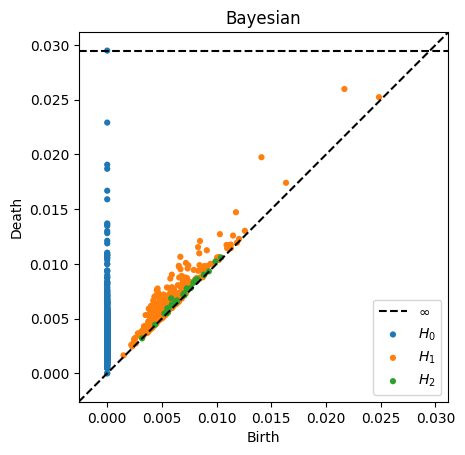

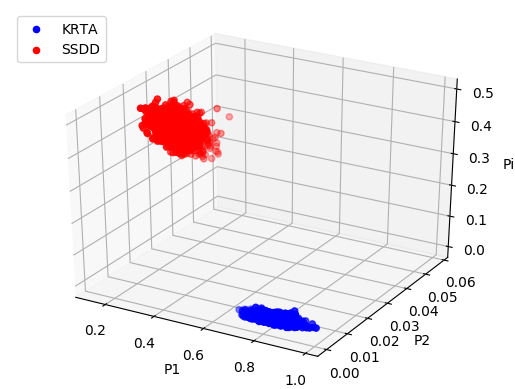

In [0]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

"""
fit = stan_model_yd(bayes_td[4])
  
print('\n Bayesian model for yeast type %r:' % 'KRTA')
print(fit)

posterior1 = fit.extract()
bayes_data = np.stack([posterior1['P1'], posterior1['P2'], posterior1['Pi']])
bayes_data = np.swapaxes(bayes_data, 0, 1)
#total_bayes_data.append(bayes_data)

  
bayes_pd = ripser(bayes_data[0:800], maxdim = 2)
  
plt.title('KRTA')
plot_diagrams(bayes_pd['dgms'], title='Bayesian')
plt.show()
"""

fit = stan_model_yd(bayes_td[5], alt_ts = True)
  
print('\n Bayesian model for yeast type %r:' % 'SSDD')
print(fit)

posterior2 = fit.extract()
bayes_data = np.stack([posterior2['P1'], posterior2['P2'], posterior2['Pi']])
bayes_data = np.swapaxes(bayes_data, 0, 1)
#total_bayes_data.append(bayes_data)

  
bayes_pd = ripser(bayes_data[0:800], maxdim = 2)
  
plt.title('SSDD')
plot_diagrams(bayes_pd['dgms'], title='Bayesian')
plt.show()


fig = plt.figure()
  
ax = fig.add_subplot(111, projection='3d')
ax.scatter(posterior1['P1'], posterior1['P2'], posterior1['Pi'], c = 'b', marker='o', label='KRTA')
ax.scatter(posterior2['P1'], posterior2['P2'], posterior2['Pi'], c = 'r', marker='o', label='SSDD')
ax.legend(loc='upper left')
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('Pi')
plt.show()


In [0]:
## Bottleneck distances for in-vivo type


for i in range(4):
  print(y_type[i])
  print(bottleneck_distance(persistence_ds[i], bayes_pd['dgms']))

WildType
[0.03109154850244522, 0.0063062431290745735, 0.0013706767931580544]
Y130C
[0.003923075273633003, 0.0026996945962309837, 0.0010622483678162098]
F53S
[0.011293597519397736, 0.0026417565532028675, 0.0015685921534895897]
E203K
[0.01711335778236389, 0.004647746682167053, 0.002196052111685276]


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c8cef31884796c806a78281f651d649 NOW.


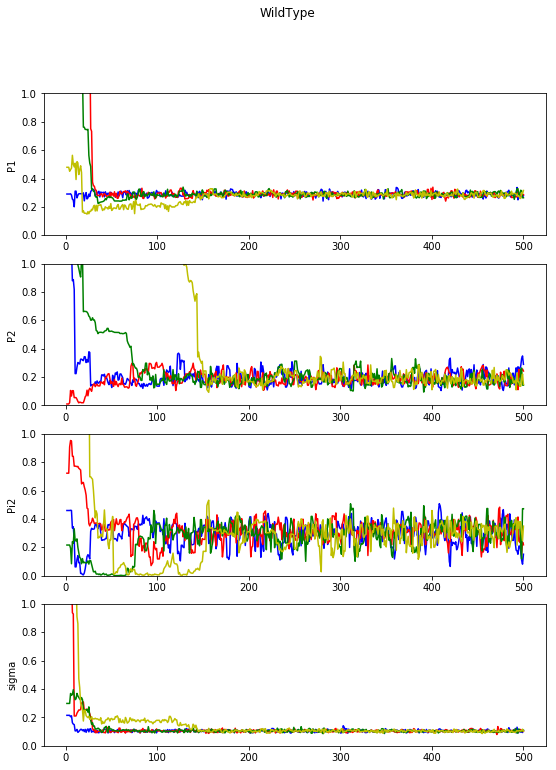

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c8cef31884796c806a78281f651d649 NOW.


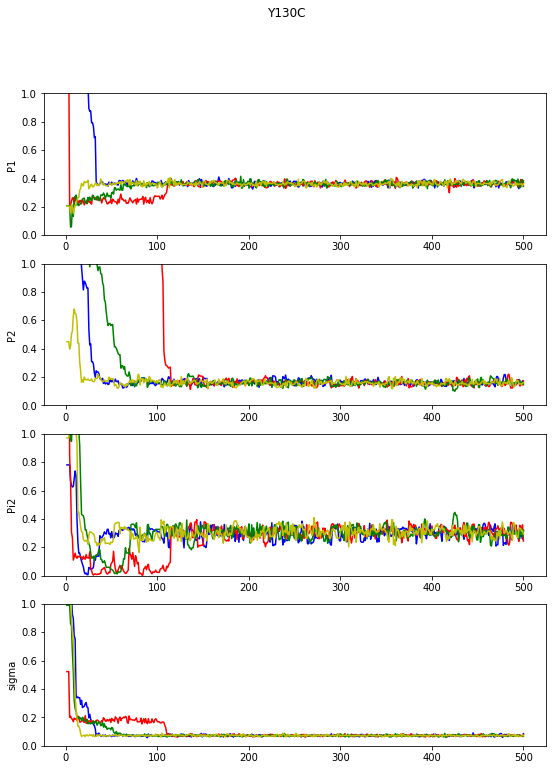

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c8cef31884796c806a78281f651d649 NOW.


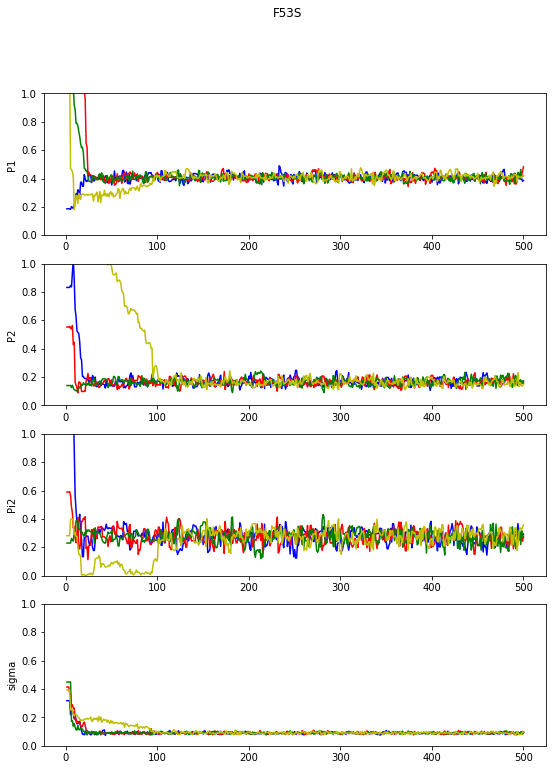

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c8cef31884796c806a78281f651d649 NOW.


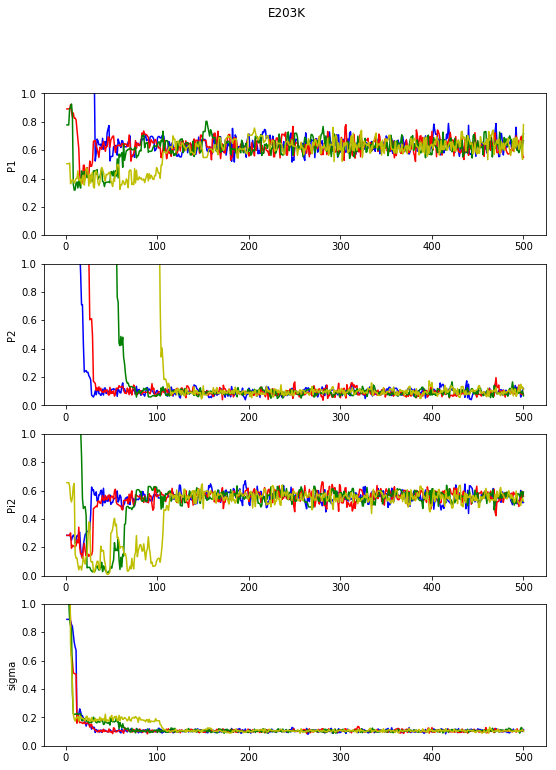

In [0]:
#Plotting traces

y_type = ['WildType', 'Y130C', 'F53S', 'E203K']
y_label = ['P1', 'P2', 'Pi2', 'sigma']

for i in range(len(y_type)):
  fit = stan_model_yd(bayes_td[i])
  values = fit.extract(permuted = False, inc_warmup = True)
  
  x_vals = range(1, 501)
  
  plt.figure(figsize=(9,12))
  plt.suptitle(y_type[i])
  
  for j in range(4):
    plt.subplot(4, 1, j + 1)
    plt.plot(x_vals, values[0:500, 0, j], c='b')
    plt.plot(x_vals, values[0:500, 1, j], c='r')
    plt.plot(x_vals, values[0:500, 2, j], c='g')
    plt.plot(x_vals, values[0:500, 3, j], c='y')
  
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.ylabel(y_label[j])

    
  plt.show()



  

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c8cef31884796c806a78281f651d649 NOW.


Inference for Stan model: anon_model_8c8cef31884796c806a78281f651d649.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
P1       0.17  3.1e-4   0.01   0.15   0.17   0.17   0.18    0.2   1420    1.0
P2       0.03  1.7e-4 5.5e-3   0.02   0.03   0.03   0.04   0.04   1102    1.0
Pi       0.35  1.3e-3   0.04   0.27   0.32   0.35   0.38   0.43   1043    1.0
sigma1   0.11  2.0e-4 7.3e-3    0.1   0.11   0.11   0.12   0.13   1397    1.0
lp__   210.29    0.05   1.49 206.59 209.55 210.65  211.4 212.12    818    1.0

Samples were drawn using NUTS at Thu May  9 15:52:58 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
[[0.18174524 0.03268443 0.37697765]
 [0.191057   0.02069214 0.44271381]
 [0.16456619 0.03395724 0.34049531]
 ...
 [0.17553

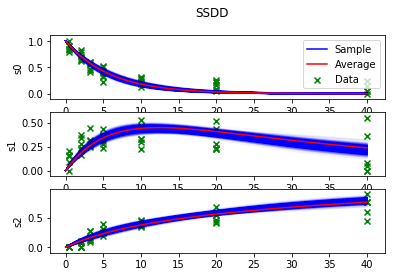

In [0]:
#Plots Bayesian model samples against empirical data

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

y_type = ['WildType', 'Y130C', 'F53S', 'E203K']
bayes_samples = []

#for i in range(len(y_type)):
for i in range(1):
  fit = stan_model_yd(bayes_td[5], alt_ts = True)
  print(fit)
  params = fit.extract()
  params = np.array([params['P1'], params['P2'], params['Pi']])
  params = np.swapaxes(params, 0, 1)
  bayes_samples.append(params)
  
#bayesian_params = [[0.29, 0.19, 0.3], [0.36, 0.16, 0.3], [0.41, 0.16, 0.28], [0.64, 0.1, 0.55]]
bayesian_params = [[0.17, 0.03, 0.35]]
#time_stamps = [0.5, 2, 3.25, 3.75, 5, 10, 20]
time_stamps = [0.5, 2, 3.25, 5, 10, 20, 40]

print(bayes_samples[0])
  
for i in range(5,6):
  scatter_x = [v for k in range(6) for v in time_stamps]
  scatter_y_s0 = [v/5 for k in range(6) for v in bayes_td[i][k, :, 0]]
  scatter_y_s1 = [v/5 for k in range(6) for v in bayes_td[i][k, :, 1]]
  scatter_y_s2 = [v/5 for k in range(6) for v in bayes_td[i][k, :, 2]]
  
  
  plot_x = np.arange(0, 40, 0.01)
  
  #plt.suptitle(y_type[i])
  plt.suptitle('SSDD')


  plt.subplot(3,1,1)
  #for params in bayes_samples[i][:, :, 0:3]:
  for params in bayes_samples[0][:, 0:3]:
    #for params1 in params:
      plt.plot(plot_x, s0_fun(plot_x, params), c='b', alpha = 0.02)
      
  plt.plot(plot_x, s0_fun(plot_x, bayesian_params[0]), c='b', label='Sample')
  plt.plot(plot_x, s0_fun(plot_x, bayesian_params[0]), c='r', label='Average')
    
  plt.scatter(scatter_x, scatter_y_s0, c='g', marker='x', label='Data')
  plt.ylabel('s0')
  plt.legend(loc='upper right')

  
  plt.subplot(3,1,2)
  #for params in bayes_samples[i][:, :, 0:3]:
  for params in bayes_samples[0][:, 0:3]:
    #for params1 in params:
      plt.plot(plot_x, s1_fun(plot_x, params), c='b', alpha = 0.02)
  
  plt.plot(plot_x, s1_fun(plot_x, bayesian_params[0]), c='b', label='Sample')
  plt.plot(plot_x, s1_fun(plot_x, bayesian_params[0]), c='r', label='Average')
    
  plt.scatter(scatter_x, scatter_y_s1, c='g', marker='x', label='Data')
  plt.ylabel('s1')

  plt.subplot(3,1,3)
  #for params in bayes_samples[0][:, :, 0:3]:
  for params in bayes_samples[0][:, 0:3]:
    #for params1 in params:
      plt.plot(plot_x, s2_fun(plot_x, params), c='b', alpha = 0.02)
  
  plt.plot(plot_x, s2_fun(plot_x, bayesian_params[0]), c='b', label='Sample')
  plt.plot(plot_x, s2_fun(plot_x, bayesian_params[0]), c='r', label='Average') 
  
  plt.scatter(scatter_x, scatter_y_s2, c='g', marker='x', label='Data')
  plt.ylabel('s2')

  
  plt.show()

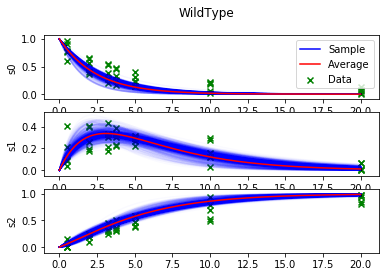

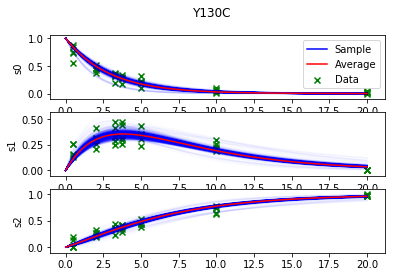

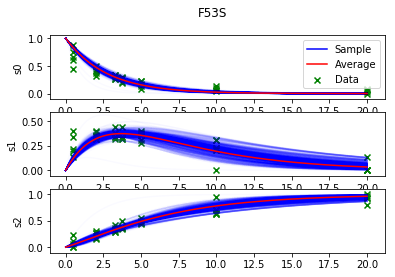

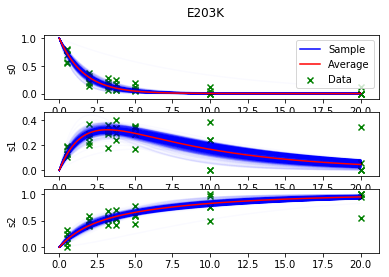

In [0]:
#Plots bootstrap model samples against empirical data

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

y_type = ['WildType', 'Y130C', 'F53S', 'E203K']
#bayes_samples = []

#for i in range(len(y_type)):
#  fit = stan_model_yd(bayes_td[i])
#  bayes_samples.append(fit.extract())
  
bs_params = [[0.41, 0.25, 0.27], [0.35, 0.19, 0.27], [0.37, 0.19, 0.25], [0.62, 0.13, 0.51]]
time_stamps = [0.5, 2, 3.25, 3.75, 5, 10, 20]
bs_samples = bs_data
  
for i in range(4):
  scatter_x = [v for k in range(5) for v in time_stamps]
  scatter_y_s0 = [v/5 for k in range(5) for v in bayes_td[i, k, :, 0]]
  scatter_y_s1 = [v/5 for k in range(5) for v in bayes_td[i, k, :, 1]]
  scatter_y_s2 = [v/5 for k in range(5) for v in bayes_td[i, k, :, 2]]
  
  
  plot_x = np.arange(0, 20, 0.01)
  
  #plt.figure(figsize=(8,10))
  plt.suptitle(y_type[i])

  plt.subplot(3,1,1)
  for params in bs_samples[i]:
    plt.plot(plot_x, s0_fun(plot_x, params), c='b', alpha = 0.02)
      
  plt.plot(plot_x, s0_fun(plot_x, bs_params[i]), c='b', label='Sample')
  plt.plot(plot_x, s0_fun(plot_x, bs_params[i]), c='r', label='Average')
    
  plt.scatter(scatter_x, scatter_y_s0, c='g', marker='x', label='Data')
  plt.ylabel('s0')
  plt.legend(loc='upper right')

  
  plt.subplot(3,1,2)
  for params in bs_samples[i]:
    plt.plot(plot_x, s1_fun(plot_x, params), c='b', alpha = 0.02)
  
  plt.plot(plot_x, s1_fun(plot_x, bs_params[i]), c='b', label='Sample')
  plt.plot(plot_x, s1_fun(plot_x, bs_params[i]), c='r', label='Average')
    
  plt.scatter(scatter_x, scatter_y_s1, c='g', marker='x', label='Data')
  plt.ylabel('s1')

  plt.subplot(3,1,3)
  for params in bs_samples[i]:
    plt.plot(plot_x, s2_fun(plot_x, params), c='b', alpha = 0.02)
  
  plt.plot(plot_x, s2_fun(plot_x, bs_params[i]), c='b', label='Sample')
  plt.plot(plot_x, s2_fun(plot_x, bs_params[i]), c='r', label='Average') 
  
  plt.scatter(scatter_x, scatter_y_s2, c='g', marker='x', label='Data')
  plt.ylabel('s2')

  
  plt.show()

In [0]:
#Plots Bayesian and BS average against data

time_stamps = [0.5, 2, 3.25, 3.75, 5, 10, 20]

bayesian_params = [[0.29, 0.19, 0.3], [0.36, 0.16, 0.3], [0.41, 0.16, 0.28], [0.64, 0.1, 0.55]]
bs_params = [[0.41, 0.25, 0.27], [0.35, 0.19, 0.27], [0.37, 0.19, 0.25], [0.62, 0.13, 0.51]]

y_type = ['Wild Type', 'Y130C', 'F53S', 'E203K']

for i in range(4):
  scatter_x = [v for k in range(5) for v in time_stamps]
  scatter_y_s0 = [v/5 for k in range(5) for v in bayes_td[i, k, :, 0]]
  scatter_y_s1 = [v/5 for k in range(5) for v in bayes_td[i, k, :, 1]]
  scatter_y_s2 = [v/5 for k in range(5) for v in bayes_td[i, k, :, 2]]
  
  
  plot_x = np.arange(0, 20, 0.01)
  
  plt.suptitle(y_type[i])

  plt.subplot(3,1,1)
  plt.plot(plot_x, s0_fun(plot_x, bayesian_params[i]), c='b', label='Bayesian')
  plt.plot(plot_x, s0_fun(plot_x, bs_params[i]), c='r', label='Bootstrap')
  plt.scatter(scatter_x, scatter_y_s0, c='g', marker='x', label='Data')
  plt.ylabel('s0')
  
  plt.subplot(3,1,2)
  plt.plot(plot_x, s1_fun(plot_x, bayesian_params[i]), c='b', label='Bayesian')
  plt.plot(plot_x, s1_fun(plot_x, bs_params[i]), c='r', label='Bootstrap')
  plt.scatter(scatter_x, scatter_y_s1, c='g', marker='x', label='Data')

  plt.subplot(3,1,3)
  plt.plot(plot_x, s2_fun(plot_x, bayesian_params[i]), c='b', label='Bayesian')
  plt.plot(plot_x, s2_fun(plot_x, bs_params[i]), c='r', label='Bootstrap')
  plt.scatter(scatter_x, scatter_y_s2, c='g', marker='x', label='Data')
  
  
  plt.show()
  

NameError: ignored

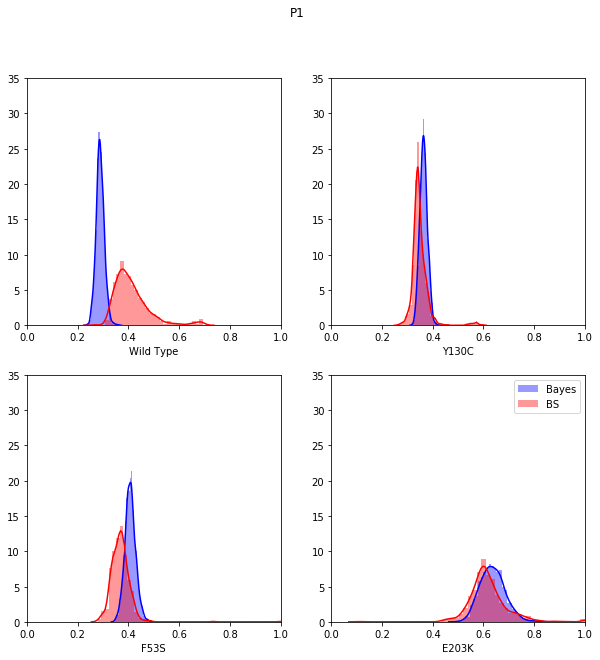

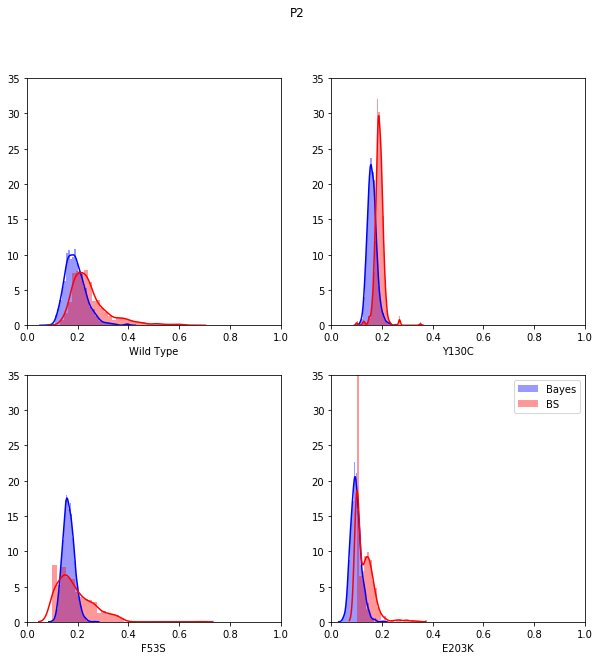

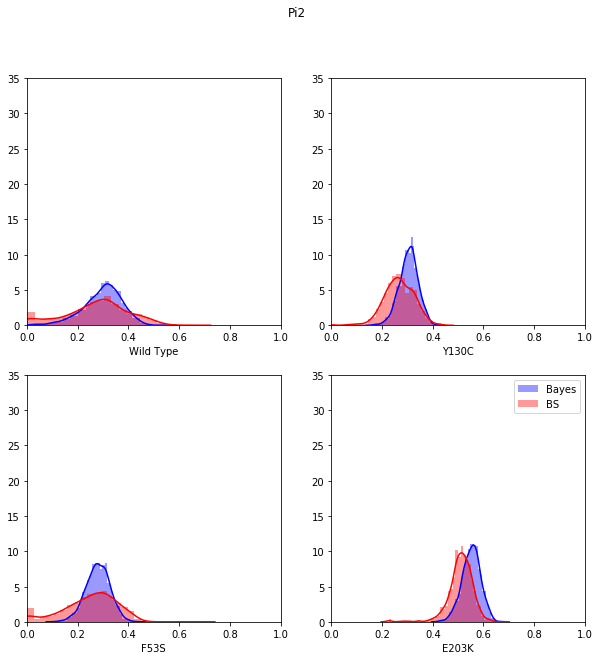

In [0]:
## Plotting marginal distribution

import seaborn as sns

y_type = ['Wild Type', 'Y130C', 'F53S', 'E203K']


plt.figure(figsize=(10,10))
plt.suptitle('P1')

# P1
for i in range(len(y_type)):
  plt.subplot(2, 2, i + 1)
  sns.distplot(total_bayes_data[i][:, 0], color = 'b', axlabel = y_type[i], label = 'Bayes', norm_hist = True)
  data = bs_data[i][:, 0]
  data = np.array(data, dtype = 'float64')
  sns.distplot(data, color = 'r', axlabel = y_type[i], label = 'BS', norm_hist = True)
  
  axes = plt.gca()
  axes.set_ylim([0,35])
  axes.set_xlim([0, 1])

plt.legend(loc='upper right')
plt.show()


plt.figure(figsize=(10,10))
plt.suptitle('P2')


# P2
for i in range(len(y_type)):
  plt.subplot(2, 2, i + 1)
  sns.distplot(total_bayes_data[i][:, 1], color = 'b', axlabel = y_type[i], label = 'Bayes', norm_hist = True)
  data = bs_data[i][:, 1]
  data = np.array(data, dtype = 'float64')
  sns.distplot(data, color = 'r', axlabel = y_type[i], label = 'BS', norm_hist = True)
  
  axes = plt.gca()
  axes.set_ylim([0,35])
  axes.set_xlim([0, 1])

plt.legend(loc='upper right')
plt.show()


plt.figure(figsize=(10,10))
plt.suptitle('Pi2')

# Pi
for i in range(len(y_type)):
  plt.subplot(2, 2, i + 1)
  sns.distplot(total_bayes_data[i][:, 2], color = 'b', axlabel = y_type[i], label = 'Bayes', norm_hist = True)
  data = bs_data[i][:, 2]
  data = np.array(data, dtype = 'float64')
  sns.distplot(data, color = 'r', axlabel = y_type[i], label = 'BS', norm_hist = True)
  
  axes = plt.gca()
  axes.set_ylim([0,35])
  axes.set_xlim([0, 1])

plt.legend(loc='upper right')
plt.show()

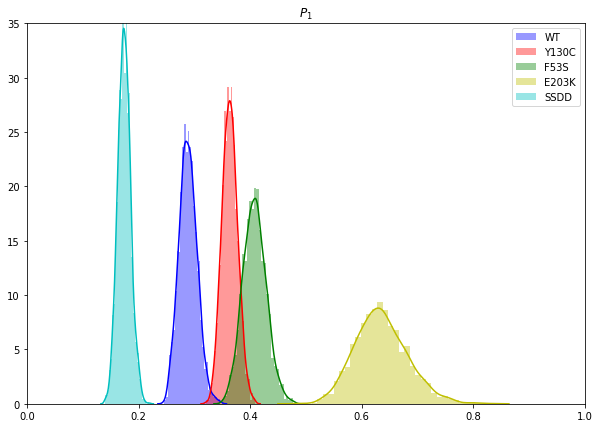

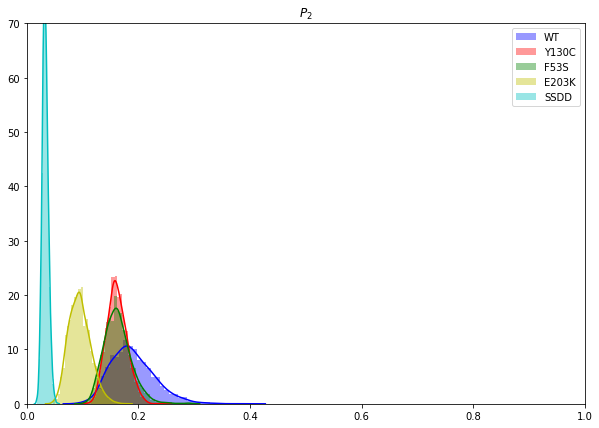

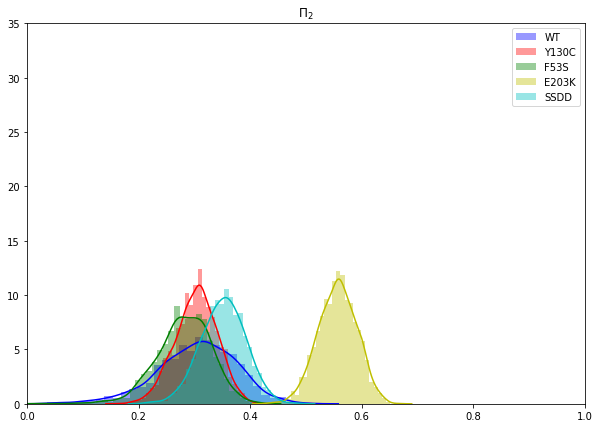

In [0]:
## Plot comparative maginal distributions for Bayesian model only

import matplotlib.pyplot as plt
import matplotlib
#import latex
#from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
#rc('text', usetex=True)

import seaborn as sns

#total_bayes_data.append(bayes_data)

#P1
plt.figure(figsize=(10,7))
plt.title(r'$P_1$')

sns.distplot(total_bayes_data[0][:, 0], color = 'b', label = 'WT', norm_hist = True)
sns.distplot(total_bayes_data[1][:, 0], color = 'r', label = 'Y130C', norm_hist = True)
sns.distplot(total_bayes_data[2][:, 0], color = 'g', label = 'F53S', norm_hist = True)
sns.distplot(total_bayes_data[3][:, 0], color = 'y', label = 'E203K', norm_hist = True)
sns.distplot(total_bayes_data[4][:, 0], color = 'c', label = 'SSDD', norm_hist = True)

axes = plt.gca()
axes.set_ylim([0,35])
axes.set_xlim([0, 1])

plt.legend(loc='upper right')
plt.savefig('P1FullHist.png', dpi=400)


#P2
plt.figure(figsize=(10,7))
plt.title(r'$P_2$')

sns.distplot(total_bayes_data[0][:, 1], color = 'b', label = 'WT', norm_hist = True)
sns.distplot(total_bayes_data[1][:, 1], color = 'r', label = 'Y130C', norm_hist = True)
sns.distplot(total_bayes_data[2][:, 1], color = 'g', label = 'F53S', norm_hist = True)
sns.distplot(total_bayes_data[3][:, 1], color = 'y', label = 'E203K', norm_hist = True)
sns.distplot(total_bayes_data[4][:, 1], color = 'c', label = 'SSDD', norm_hist = True)


axes = plt.gca()
axes.set_ylim([0,70])
axes.set_xlim([0, 1])

plt.legend(loc='upper right')
plt.savefig('P2FullHist.png', dpi=400)


#Pi2
plt.figure(figsize=(10,7))
plt.title(r'$\Pi_2$')

sns.distplot(total_bayes_data[0][:, 2], color = 'b', label = 'WT', norm_hist = True)
sns.distplot(total_bayes_data[1][:, 2], color = 'r', label = 'Y130C', norm_hist = True)
sns.distplot(total_bayes_data[2][:, 2], color = 'g', label = 'F53S', norm_hist = True)
sns.distplot(total_bayes_data[3][:, 2], color = 'y', label = 'E203K', norm_hist = True)
sns.distplot(total_bayes_data[4][:, 2], color = 'c', label = 'SSDD', norm_hist = True)

axes = plt.gca()
axes.set_ylim([0,35])
axes.set_xlim([0, 1])

plt.legend(loc='upper right')
plt.savefig('Pi2FullHist.png', dpi=400)

In [0]:
### Calculates Wasserstein Distances of point clouds

import scipy as sp
#import ot

def emd(data1, data2):
  dist = []
  for i in range(3):
    dist.append(sp.stats.wasserstein_distance(data1[:, i], data2[:, i]))
    
  return dist



for i in range(len(total_bayes_data) - 1):
  for j in range(i + 1, len(total_bayes_data)):
    print('Wasserstein distance between %s and %s:' % (y_type[i], y_type[j]))
    print(emd(total_bayes_data[i], total_bayes_data[j]))

Wasserstein distance between WildType and Y130C:
[0.07469838540020274, 0.03054428467768368, 0.029086494279216217]
Wasserstein distance between WildType and F53S:
[0.11875638457007412, 0.02685142441752226, 0.029815245887823527]
Wasserstein distance between WildType and E203K:
[0.34525791010265383, 0.0942904492800267, 0.25249304508696874]
Wasserstein distance between WildType and nothing:
[0.11449208668573811, 0.15727044482137442, 0.05019707422440603]
Wasserstein distance between Y130C and F53S:
[0.044057999169871395, 0.00425291910056838, 0.02612779858454237]
Wasserstein distance between Y130C and E203K:
[0.27055952470245104, 0.0640559183928852, 0.24883574981181034]
Wasserstein distance between Y130C and nothing:
[0.18919047208594086, 0.12703591393423297, 0.04586481138250411]
Wasserstein distance between F53S and E203K:
[0.22650152553257966, 0.06759368120398018, 0.27496354839635273]
Wasserstein distance between F53S and nothing:
[0.23324847125581225, 0.13057367674532797, 0.07199260996704

In [0]:
### Compute KL divergence
import math

y_type = ['Wild Type', 'Y130C', 'F53S', 'E203K', 'SSDD']

def KL(a, b, k = 10):
  kl_sum = 0
  
  for i in range(a.shape[0]):
    kl_sum -= math.log(kth_nn(a, a[i], k + 1)/kth_nn(b, a[i], k), 2)
  
  kl_sum = a.shape[1]/a.shape[0]*kl_sum
  
  return kl_sum + math.log(a.shape[0]/(a.shape[0] - 1), 2)
  
  
def kth_nn(a, v, k):
  return np.sort(np.array([np.linalg.norm(v-x) for x in a]))[k - 1]



for i in range(len(total_bayes_data) - 1):
  for j in range(i + 1, len(total_bayes_data)):
    print('KL Divergence D(%s || %s):' % (y_type[i], y_type[j]))
    print(KL(total_bayes_data[i], total_bayes_data[j]))
    print('KL Divergence D(%s || %s):' % (y_type[j], y_type[i]))
    print(KL(total_bayes_data[j], total_bayes_data[i]))

KL Divergence D(Wild Type || Y130C):
6.708125099119998
KL Divergence D(Y130C || Wild Type):
7.677932968764842
KL Divergence D(Wild Type || F53S):
8.622418068166505
KL Divergence D(F53S || Wild Type):
9.312377502321448
KL Divergence D(Wild Type || E203K):
14.429473900934813
KL Divergence D(E203K || Wild Type):
14.694351924905565
KL Divergence D(Wild Type || SSDD):
11.763563269773542
KL Divergence D(SSDD || Wild Type):
14.42654784609277
KL Divergence D(Y130C || F53S):
3.630265071632518
KL Divergence D(F53S || Y130C):
3.515307330220308
KL Divergence D(Y130C || E203K):
15.587210155064833
KL Divergence D(E203K || Y130C):
14.107186007443623
KL Divergence D(Y130C || SSDD):
14.463035086477456
KL Divergence D(SSDD || Y130C):
15.814473187773642
KL Divergence D(F53S || E203K):
14.051787260645964
KL Divergence D(E203K || F53S):
13.574441209016435
KL Divergence D(F53S || SSDD):
13.920690042913245
KL Divergence D(SSDD || F53S):
16.329271090195682
KL Divergence D(E203K || SSDD):
15.932180731140805
KL

In [0]:
### Calculate MMD
import math

def grbf_kernel(x1, x2, sigma = 0.1):
    '''Calculates the Gaussian radial base function kernel'''
    n, nfeatures = x1.shape
    m, mfeatures = x2.shape
    
    k1 = np.sum((x1*x1), 1)
    q = np.tile(k1, (m, 1)).transpose()
    del k1
    
    k2 = np.sum((x2*x2), 1)
    r = np.tile(k2.T, (n, 1))
    del k2
    
    h = q + r
    del q,r
    
    # The norm
    h = h - 2*np.dot(x1,x2.transpose())
    h = np.array(h, dtype=float)
    
    return np.exp(-1.*h/(2.*pow(sigma,2)))


def MMD_unbiased(Kxx, Kyy, Kxy):
#This function is taken from https://github.com/eugenium/MMD/blob/master/mmd.py
#on 13/05/19
#The estimate when distribution of x is not equal to y
    m = Kxx.shape[0]
    n = Kyy.shape[0]
    
    t1 = (1./(m*(m-1)))*np.sum(Kxx - np.diag(np.diagonal(Kxx)))
    t2 = (2./(m*n)) * np.sum(Kxy)
    t3 = (1./(n*(n-1)))* np.sum(Kyy - np.diag(np.diagonal(Kyy)))
    
    MMDsquared = (t1-t2+t3)
    
    return MMDsquared


def euclidian_kernel(a, b):
  return a[0]*b[0] + a[1]*b[1] + a[2]*b[2]


def my_mmd(a, b):
  """
  #Euclidean
  Kxx = np.array([[euclidian_kernel(x, y) for y in a] for x in a])
  Kyy = np.array([[euclidian_kernel(x, y) for y in b] for x in b])
  Kxy = np.array([[euclidian_kernel(x, y) for y in b] for x in a])
  """
  
  #Gaussian
  Kxx = grbf_kernel(a, a)
  Kyy = grbf_kernel(b, b)
  Kxy = grbf_kernel(a, b)
  
  return math.sqrt(MMD_unbiased(Kxx, Kyy, Kxy))


for i in range(len(total_bayes_data) - 1):
  for j in range(i + 1, len(total_bayes_data)):
    print('MMD between %s and %s:' % (y_type[i], y_type[j]))
    print(my_mmd(total_bayes_data[i], total_bayes_data[j]))

MMD between Wild Type and Y130C:
0.3940661160105817
MMD between Wild Type and F53S:
0.7024333894412573
MMD between Wild Type and E203K:
1.331587829040104
MMD between Wild Type and SSDD:
1.1967257268744602
MMD between Y130C and F53S:
0.17350285142301813
MMD between Y130C and E203K:
1.5623688219359124
MMD between Y130C and SSDD:
1.5766318438330897
MMD between F53S and E203K:
1.4657945074748808
MMD between F53S and SSDD:
1.5646112007350488
MMD between E203K and SSDD:
1.5732694730679564


In [0]:
## Classifiying using PIs and SVM

from sklearn import svm

persistence_ims = []
generator = images.PersImage(spread = 0.001, specs = {"maxBD": 0.05, "minBD": 0}, verbose = False)

for pd in persistence_ds:
  image = generator.transform(pd[1:3])
  unpacked_image = [val for subimage in image for vals in subimage for val in vals]
  persistence_ims.append(unpacked_image)
  
persistence_ims = np.array(persistence_ims)
#persistence_ims = np.swapaxes(persistence_ims, 0, 1)

print(persistence_ims)


clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(persistence_ims, y_type)

#dec = clf.decision_function([[1]])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


ValueError: ignored